Saving хина 2.jpg to хина 2.jpg


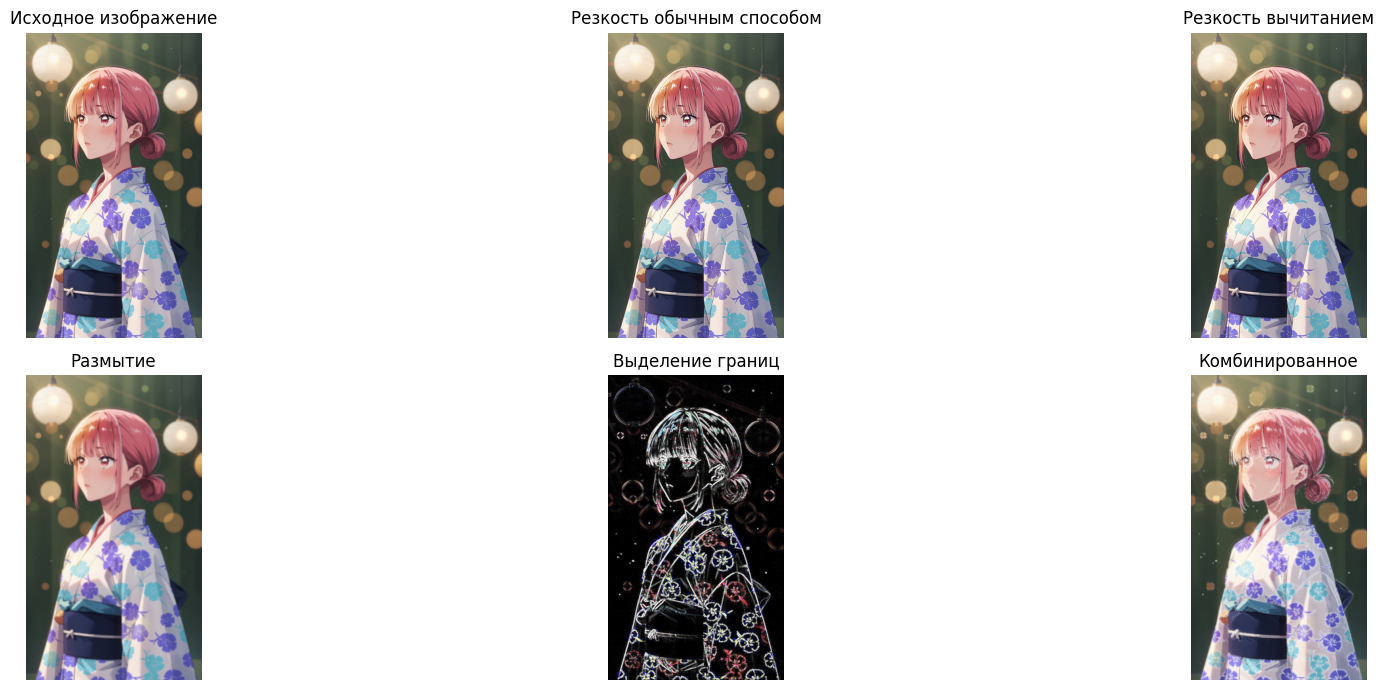

In [39]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

# Функция для загрузки изображения
uploaded = files.upload()

# Получаем имя загруженного файла
# Читаем загруженное изображение
image_path = next(iter(uploaded))
image = cv2.imread(image_path)

# Обработка картинки
blurred_image = cv2.GaussianBlur(image, (11, 11), 0)

# Повышение резкости
kernel = np.array([[0, -1, 0],
 [-1, 5, -1],
 [0, -1, 0]])
sharpened_image = cv2.filter2D(image, -1, kernel)
sharpened_image_2 = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

# Границы
edges = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)
edges = cv2.convertScaleAbs(edges)

# Комбинирование
combined = cv2.addWeighted(sharpened_image, 1, edges, 0.8, 0)
combined = cv2.addWeighted(combined, 0.5, blurred_image, 0.5, 0)

# Преобразуем изображение из BGR (формат OpenCV) в RGB (формат для Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_razm = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)
image_rezk = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB)
image_rezk2 = cv2.cvtColor(sharpened_image_2, cv2.COLOR_BGR2RGB)
image_edge = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
image_combined = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)

# Отображение изображений
plt.figure(figsize=(21, 7))

# Исходное изображение
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Исходное изображение')
plt.axis('off')

# Резкость 1 изображение
plt.subplot(2, 3, 2)
plt.imshow(image_rezk)
plt.title('Резкость обычным способом')
plt.axis('off')

# Резкость 2 изображение
plt.subplot(2, 3, 3)
plt.imshow(image_rezk2)
plt.title('Резкость вычитанием')
plt.axis('off')

# Размытое изображение
plt.subplot(2, 3, 4)
plt.imshow(image_razm)
plt.title('Размытие')
plt.axis('off')

# Границы изображение
plt.subplot(2, 3, 5)
plt.imshow(image_edge)
plt.title('Выделение границ')
plt.axis('off')

# Комбинированное изображение
plt.subplot(2, 3, 6)
plt.imshow(image_combined)
plt.title('Комбинированное')
plt.axis('off')

# Показать все изображения
plt.tight_layout()
plt.show()